# Unit 2 - Example 3

In [0]:
import matplotlib.pyplot as plt 
import numpy
from array import array

In [0]:
# Main subroutine calculates cost R(x,a) and 
# transition distribution for given state-action
# pair (x,a). 

def makeTransitionList( stateArray, action, muRate, lambdaRate, qCapacity):
  
  # Assume server has moved to the queue determined by action.  
    
  currentQ = action
  otherQ = 3 - action
    
  # Store transition rates in a single vector. 
  
  transitionRate = [muRate,lambdaRate,lambdaRate]
  
  # Determine if the various transitions are admissible.  
  # If not, set transition rate to zero. 
  
  if (stateArray[currentQ-1]==0): transitionRate[0] = 0
  if (stateArray[currentQ-1]==qCapacity): transitionRate[1] = 0
  if (stateArray[otherQ-1]==qCapacity): transitionRate[2] = 0
  
  # The stage length may now be calculated. 
  
  stageLength = sum(transitionRate)**(-1)
  
  # Create objects to store admissible transitions, 
  # and transition probabilities. 
  
  nTransitions = 3-transitionRate.count(0)
  transitionList = numpy.zeros(shape=(nTransitions, 3),dtype='int')
  pTransitions = [0]*nTransitions
  
  # Consider potential transitions separately. 
  
  iList = -1
  if (transitionRate[0] > 0):
    iList = iList + 1
    for ii in range(3): transitionList[iList][ii] = stateArray[ii]
    transitionList[iList][currentQ-1] =  transitionList[iList][currentQ-1]-1
    pTransitions[iList] = transitionRate[0]/sum(transitionRate)
    transitionList[iList][2] = currentQ
  
  if (transitionRate[1] > 0):
    iList = iList + 1
    for ii in range(3): transitionList[iList][ii] = stateArray[ii]
    transitionList[iList][currentQ-1] =  transitionList[iList][currentQ-1]+1
    pTransitions[iList] = transitionRate[1]/sum(transitionRate)
    transitionList[iList][2] = currentQ
    
  if (transitionRate[2] > 0):
    iList = iList + 1
    for ii in range(3): transitionList[iList][ii] = stateArray[ii]
    transitionList[iList][otherQ-1] =  transitionList[iList][otherQ-1]+1
    pTransitions[iList] = transitionRate[2]/sum(transitionRate)
    transitionList[iList][2] = currentQ
        
  # Calculate cost. 
  
  cost = 0 
  if (action!=stateArray[2]): cost = 1
  cost = cost + 3*stageLength*((stateArray[0]**2)+(stateArray[1]**2)) 
  
  # Return the components. 
  
  return nTransitions, stageLength, transitionList, pTransitions, cost

In [0]:
# Define dynamic programming solution components.

qCapacity = 10
valueFunction = numpy.zeros(shape=(2,qCapacity+1,qCapacity+1))
valueFunctionOld = numpy.zeros(shape=(2,qCapacity+1,qCapacity+1))
policyFunction = numpy.zeros(shape=(2,qCapacity+1,qCapacity+1))

In [0]:
# Define model parameters: service rate (murate); 
# arrival rate (lambdaRate); discount factor (beta). 

muRate = 1.0
lambdaRate = 0.9
beta = 0.99

In [0]:
# The number of iterations is fixed by nTrace. 
# One element of the value function V(0,0,0) will be 
# stored after each iteration in array vTrace, so that 
# progress towards the limit can be observed. 

nTrace = 1000
vTrace = array('l')
vTrace = [0]*nTrace

In [0]:
# Begin value function iterations.

for iii in range(nTrace): 

        # Store current value function in valueFunctionOld.         
    
        for i in range(qCapacity+1):
            for j in range(qCapacity+1):
                for k in range(2):        
                    valueFunctionOld[k][i][j] = valueFunction[k][i][j]
      
        # Loop through entire stateArray space. 
  
        for u0 in range(2):
            for w1 in range(qCapacity+1): 
                for w2 in range(qCapacity+1): 
      
                    # Current queue is either u = 1 or 2. 
                    # Inititalize a current state vector 
                    # stateArray = [w1,w2,u], and a 
                    # subsequent state vector stateArrayNext. 
                    
                    u = u0+1
                    stateArray = array('i')
                    stateArray = [w1,w2,u]
                    stateArrayNext = array('i')
                    stateArrayNext = [0,0,0]
        
                    # Inititalize Q-values V(x,a).  
        
                    valueActionFunction = [0]*2
                    
                    # Evaluate V(x,a) for each action. 
                    
                    for a0 in range(2):
                            
                            # Collect components to evaluate V(x,a).
                        
                            nTransitions, stageLength, transitionList, pTransitions, cost = makeTransitionList(stateArray,a0+1,muRate,lambdaRate,qCapacity)
                            valueActionFunction[a0] = cost
        
                            # Perform the evaluation.   
        
                            for i in range(nTransitions):
                                for ii in range(3): stateArrayNext[ii] = transitionList[i][ii]
                                valueActionFunction[a0] = valueActionFunction[a0] + beta*valueFunctionOld[stateArrayNext[2]-1][stateArrayNext[0]][stateArrayNext[1]]*pTransitions[i]
          
                    # Store minimum V(x,a) into value function, 
                    # then store minimizing action. 
                                
                    valueFunction[stateArray[2]-1][stateArray[0]][stateArray[1]] = min(valueActionFunction)
                    policyFunction[stateArray[2]-1][stateArray[0]][stateArray[1]] = valueActionFunction.index(min(valueActionFunction))+1
    
        
        # Store current value of V(0,0,0). 
 
        vTrace[iii] = valueFunction[0][0][0]

Optimal Action: current
[[1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]]

[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]



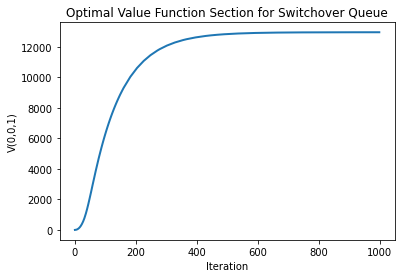

In [14]:
print("Optimal Action: current"  )    
print(policyFunction[0])
print()
print(policyFunction[1])
print()

plt.plot(range(nTrace),vTrace,linewidth=2) 
plt.xlabel('Iteration') 
plt.ylabel('V(0,0,1)') 
plt.title('Optimal Value Function Section for Switchover Queue') 
plt.show() 